In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

In [2]:
income_path = "county_income_df.csv"
full_income_df = pd.read_csv(income_path)
min_path = "Min_Overall_Ratings_perCounty.csv"
max_path = "Max_Overall_Ratings_perCounty.csv"
max_df = pd.read_csv(max_path)
min_df = pd.read_csv(min_path)

In [3]:

# Make the county name formats match
max_df['County Name'] = max_df['County Name'].str.lower()
max_df['County Name'] = max_df['County Name'].str.title()
max_df = max_df.rename(columns={'County Name':'County'})
min_df['County Name'] = min_df['County Name'].str.lower()
min_df['County Name'] = min_df['County Name'].str.title()
min_df = min_df.rename(columns={'County Name':'County'})
income_df = full_income_df[['County','Household Income','Population']]
income_df = income_df.dropna(subset=['County'])

In [4]:
max# Merge dataframes
scatter_df = pd.merge(max_df,income_df,on='County')
scatter_df.head()
min_scatter_df = pd.merge(min_df,income_df,on='County')

In [5]:
# Add regions to dataframe
northern = ["Del Norte","Siskiyou","Modoc","Humboldt","Trinity","Shasta",
            "Lassen","Mendocino","Tehama","Plumas","Lake","Glenn","Colusa",
            "Butte"]
bay_area = ["Sonoma","Napa","Marin","Solano","Contra Costa","San Francisco",
            "San Mateo","Alameda","Santa Cruz","Santa Clara","San Benito",
            "Monterey"]
mountain_valley = ["Inyo","Mono","Tuolumne","Alpine","Calaveras","Amador",
                   "El Dorado","Sacramento","Placer","Nevada","Sierra",
                   "Yuba","Sutter","Yolo"]
central_valley = ["San Joaquin","Stanislaus","Merced","Mariposa","Madera",
                  "Fresno","Kings","Tulare","San Luis Obispo","Kern"]
southern = ["Santa Barbara","Ventura","Los Angeles","San Bernardino",
            "Orange","Riverside","San Diego","Imperial"]
regions = []
for county in scatter_df['County']:
    if county in northern:
        regions.append("Northern Region")
    elif county in bay_area:
        regions.append("Bay Area Region")
    elif county in mountain_valley:
        regions.append("Mountain Valley Region")
    elif county in central_valley:
        regions.append("Central Valley Region")
    elif county in southern:
        regions.append("Southern Region")
    else:
        regions.append("NaN")
scatter_df["Regions"] = regions
min_scatter_df["Regions"] = regions

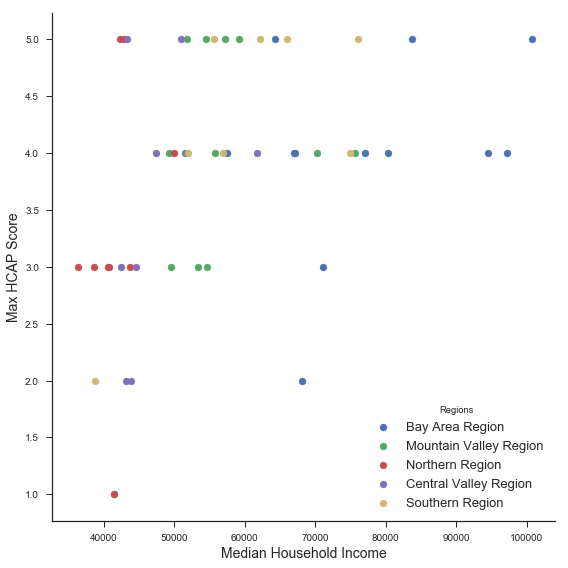

In [6]:
# Plot max HCAP Score vs income
fg = seaborn.FacetGrid(data=scatter_df, hue='Regions',size=8,aspect=1,legend_out=False)
fg.map(pyplot.scatter, 'Household Income', 'Overall_Hos_Rating').add_legend(fontsize=13)
plt.xlabel("Median Household Income",fontsize=14)
plt.ylabel("Max HCAP Score",fontsize=14)
plt.savefig("max_HCAP_Score_VS_income.png")
plt.show()

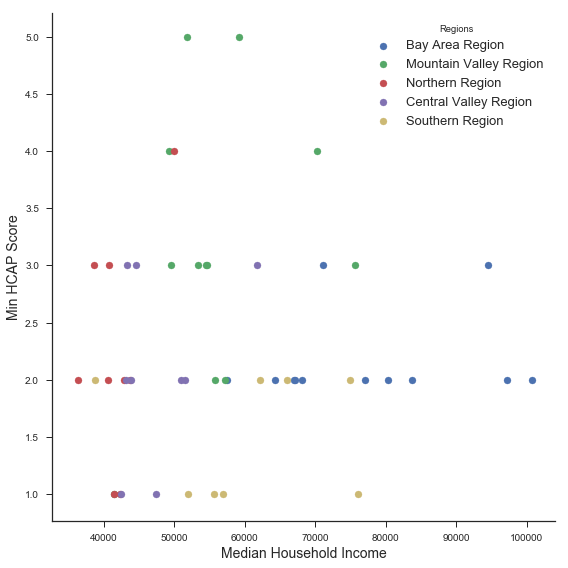

In [7]:
# Plot min HCAP Score vs income
fg = seaborn.FacetGrid(data=min_scatter_df, hue='Regions',size=8,aspect=1,legend_out=False)
fg.map(pyplot.scatter, 'Household Income', 'Overall_Hos_Rating').add_legend(fontsize=13)
plt.xlabel("Median Household Income",fontsize=14)
plt.ylabel("Min HCAP Score",fontsize=14)
plt.savefig("min_HCAP_Score_VS_income.png")
plt.show()